# Основы асинхронности в Python

- Она нужно для I/O задач
- [Нашел хороший доп курс](https://vkvideo.ru/playlist/-221962000_1)

## Занятие 1 

Главное преимущество АСИНХРОННОСТИ в отличие от THREAD-ов, так это то что они менее затратны по памяти и работают быстрее.


### `Генераторы`
- это функции внутри, которых есть ключевое слово `yield` - интерпретатор будет генеирорвать не как обычную функцию, а как генератор

Есть такие методы у генераторов:

- __iter__() - возвращает сам объект итератор
- __next__() - возвращает следующее значение, как только итератор заканчивается, он выкидывает исключение `StopIteration`

ВАЖНО НЕ ПУТАТЬ:
- **ФУНКЦИЮ ГЕНЕРАТОР** - это то, что возвращет генератор
- **ОБЪЕКТ ГЕНЕРАТОР** - это то, что возвращет функция генератор, то по-чему мы затем итерируемся...

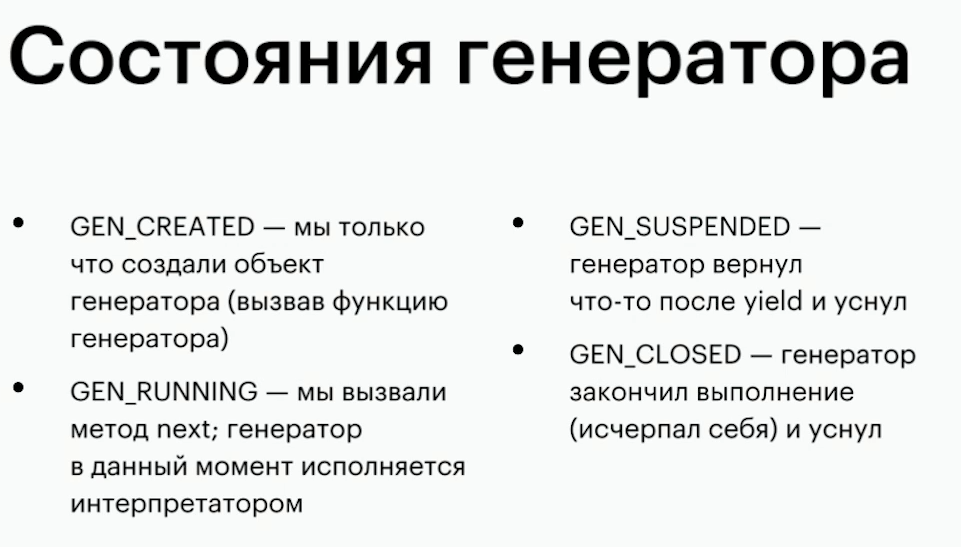

**Состояне генератора можно посмотреть через:**
```Python
import inspect
inspect.getgeneratorstate(ГЕНЕРАТОР)
```

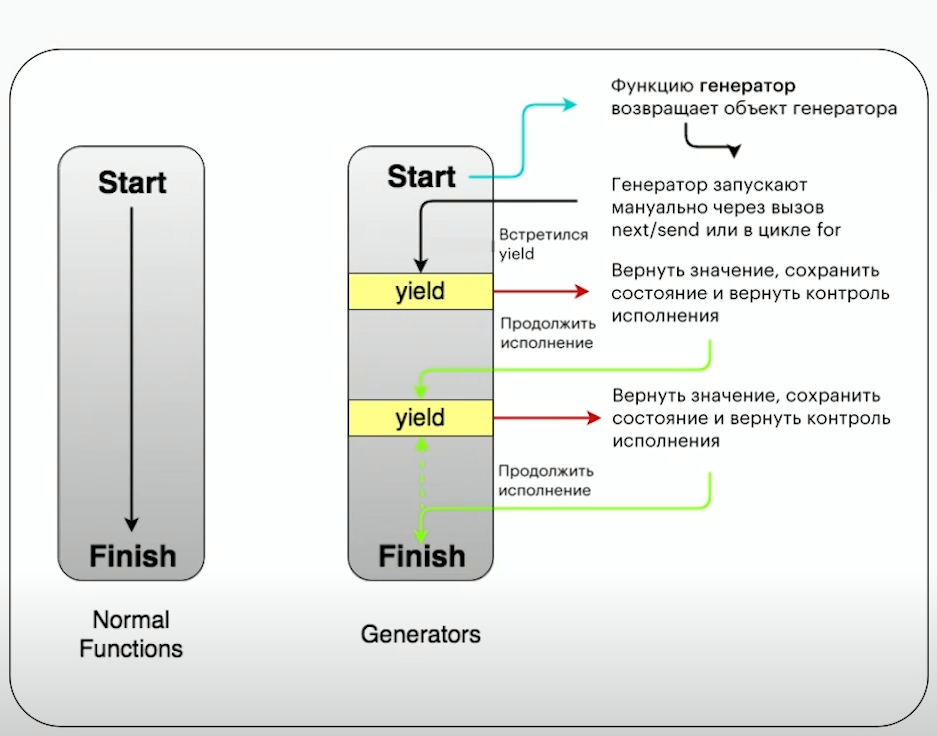

### 3 специальных метода ГЕНЕРАТОРА

- `close()` - сразу перемещаемся в конец итератора. Нужен, чтобы грамотно закрывать какое-то соединение с помощью try и except:

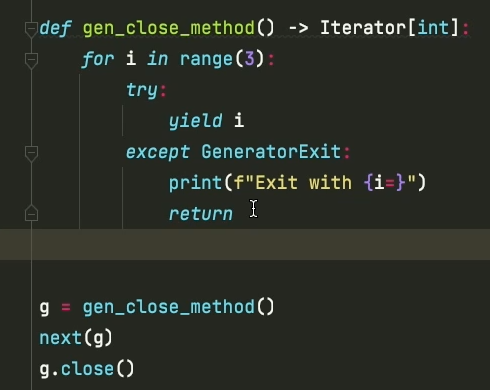

- `send()` - нужен, чтобы внутрь функции вставлять какое-то значение, где стоял `yield` - вставится значение переданное в качестве аргумента в `send()`

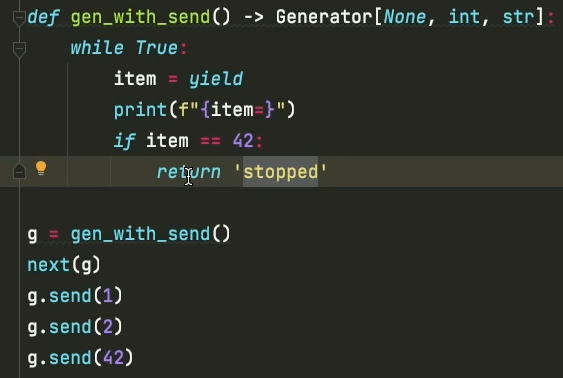

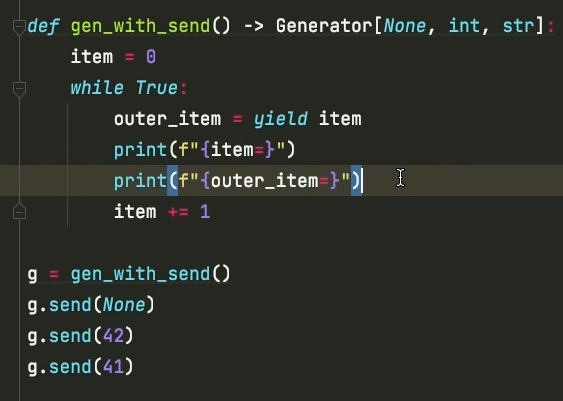

```Python
outer_item = yield item 
```
> Эта строка работает так, что при `next(ГЕНЕРАТОР)` выполняется `yield item`, а при `send()` выполняется `outer_item = yield`

- `throw()`


**Есть конструкция `yield from`**

- он принимает выращение, как итератор или генератор.
- Это типо возвращет значение генератора в цикле for i in range(3) yield i

ЭТА КОНСТРУКЦИЯ ПРОСТО СРАЗУ СОЕДИНЯЕТ ТО МЕСТО, КОТОРОЕ ЕГО ВЫЗВАЛО И ДРУГОЙ ГЕНЕРАТОР и все команды с этого момента будут адресовываться ГЕНЕРАТОРУ, который должен был идти по циклу, но вместо этого он сразу будет адресовываться другому генратору, что ускорит работу и ЭТО ПРОДОЛЖАЕТСЯ ПОКА генератор не закроется...

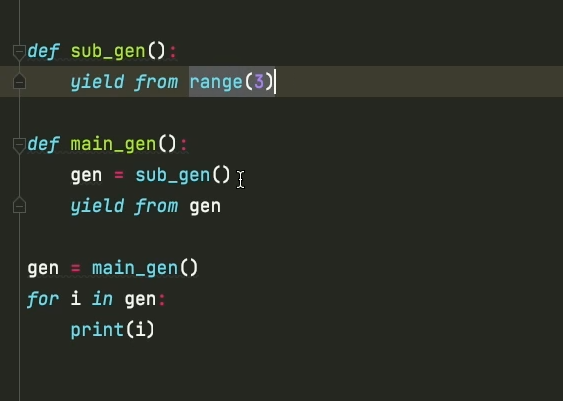

## Задача1: "Интерактивный робот-обработчик"
**Цель:** Создать генератор, который симулирует работу робота. Робот будет получать задачи, обрабатывать их, сообщать о своем статусе и выполнять специальные команды.

Описание:

Напишите генератор robot_worker().

1) При запуске робот должен сообщить, что он готов к работе, и перейти в режим ожидания.

2) Роботу можно отправлять задачи с помощью метода send().

3) Обычная задача — это число. Робот должен умножить его на 10 и сообщить о результате.

4) Специальные команды (строки):

- "почистить кеш": Робот должен сообщить, что кеш очищен.

- "самодиагностика": Робот должен запустить под-задачу (другой генератор) для диагностики, которая выполняет несколько шагов.

5) Робота можно "выключить" с помощью метода close(). При выключении он должен корректно завершить работу и сообщить об этом.

In [ ]:
import inspect
from typing import Iterator

def robot_setting():
    yield from range(20)

def robot_worker() -> Iterator[int]:
    while True:
        try:
            task = yield # None

            if isinstance(task, int):
                print(task * 10)
            
            elif task == "Почистить кеш":
                print("Кеш очистен")

            elif task == "самодиагностика":
                yield from robot_setting()
        
        except GeneratorExit:
            print("Вы выключели РОБОТА!")
            return 
        
robot = robot_worker()
if inspect.getgeneratorstate(robot) == 'GEN_CREATED':
    print("Готов к работе")

next(robot) # Нужно для начальной инициализации
robot.send(4)
robot.send(2)
next(robot) # срабатывает yield None
robot.send("Почистить кеш")
robot.send("самодиагностика")
# robot.send(4) < - возникнет исключение, т.к. обращение идет к robot_setting-у
for _ in range(20):
    print(next(robot))
robot.send(4)
robot.close()

Готов к работе
40
20
Кеш очистен
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
None
40
Вы выключели РОБОТА!


## Занятие 2: Асинхронность в Python: event loop и корутины



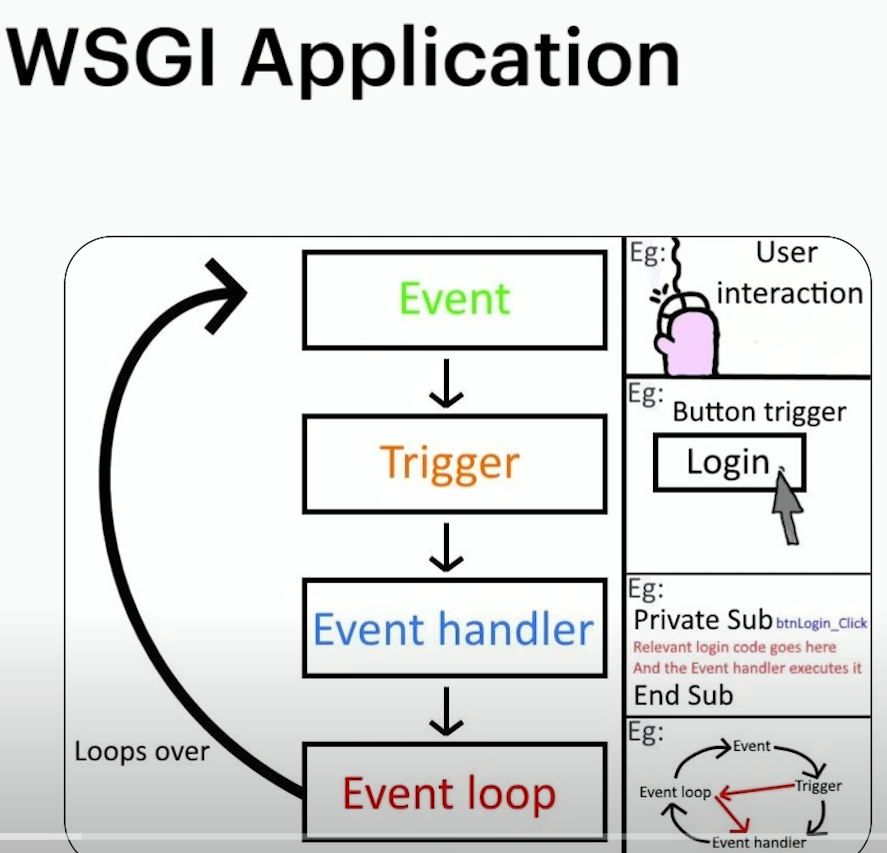

1) В неасинхронносм подходе все было прямолинейно и понятно, что когда происходин.
2) В асинхронном же подходе есть EVENT LOOP, который всегда все прослушивает на входящие сообщения **[EVENT]**.
- При получение EVENT, он понимает что с ним произошло  **[TARGET]**
- Находит подходящий handler для этого EVENT-а **[EVENT HADLER]** 
- И отправляет его на обработку **[EVENT LOOP]**

### `Asyncio`
- [ДОКУМЕНТАЦИЯ](https://docs.python.org/3/library/asyncio-task.html#coroutine)
- [ВИДЕО](https://youtu.be/_4QY1nGFRY8?si=Y6YiqgXXr7JZVsPM)

```Python
import asyncio

loop = asyncio.get_event_loop()
```
get_event_loop() - создает EVENT LOOP, если он не создан, создает новый и возвращает его.

`КОРУТИНЫ` - это функции, которые могут быть приостановлены и возобновлены позже. Они позволяют писать асинхрронный код.

В PYTHON раньше писали асинхронное программирование с помощью генераторов, но потом появился декаратор `@asyncio.corutine`# который потом удалили


### ВАЖНО: Что при выполнении любого синхронного кода `time.sleep()` приведет к блокированию асинхрнного кода и следовательно асинхронность исчезнет на некоторое время  

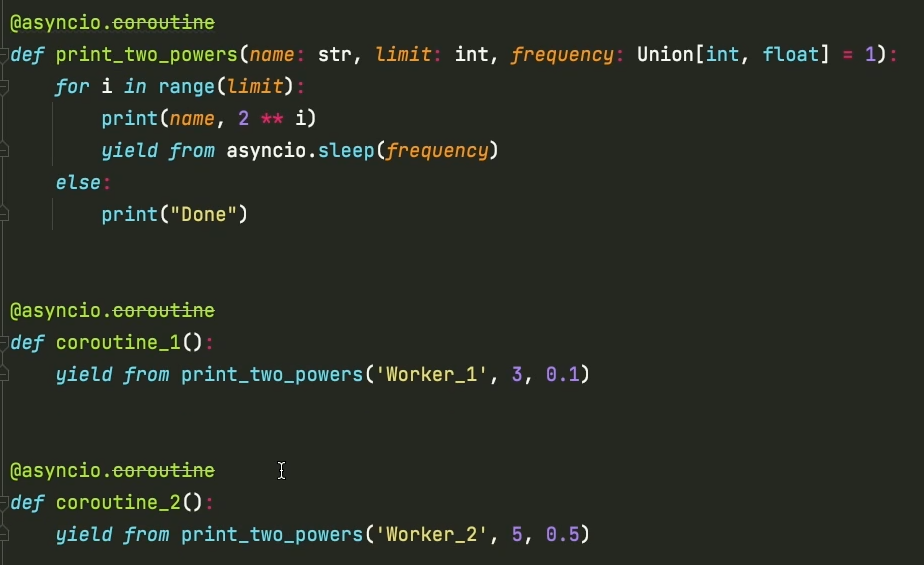

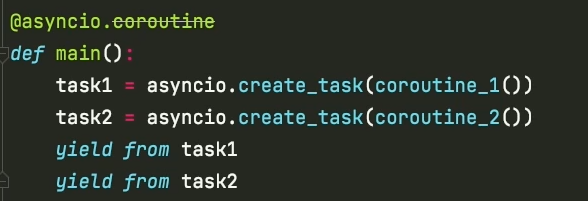

- Когда создаем `task` мы делаем наши функции не блокирующим -> следовательно создается асинхронность, а не последовательное выполнение программ

`asyncio.run()` — это функция, которая используется для запуска асинхронных (корутинных) функций в Python. Она является основным способом запуска асинхронного кода и служит точкой входа в программу.

Основные характеристики asyncio.run():

1) Создаёт новый цикл событий (event loop) для выполнения корутины.

2) Автоматически закрывает цикл событий после завершения выполнения.

3) Возвращает результат выполнения корутины.

4) Может принимать параметр debug=False для включения режима отладки.

Важные особенности использования:

1) Функция должна вызываться только один раз в программе как основная точка входа.

2) Нельзя использовать asyncio.run(), если в том же потоке уже запущен другой цикл событий.

3) Подходит для запуска главной корутины программы.


`@asyncio.corutine` удалили:
И теперь появились такие ключевые слова:

- `async def` - вместо декаратора
- `await` - вместо yield from, он включает в фоновом режиме асинхронную функцию до получения результата, а пока будет выполнять другие функции. Управление вернется EVENT LOOP-у

Как работает `await`?
1) Как только в коде встречается `await` управление отдается планировщику
2) Планировщик понимает, что ему нужно запустить дальше
- `await` можно вызвать для тех объектов, которые awaitable (дожидаемые). # Класс в котором реализован метод `__await__`

**ПРИМЕР: Асинхронной загруки файлов**
- [документация](https://github.com/Tinche/aiofiles)

```Python
import asyncio
import aiofiles

async def read_file(filepath):
    async with aiofiles.open(filepath, 'r') as file:
        return await file.read()

async def main():
    filepaths = ['file1.txt', 'file2.txt']
    data = await read_file(filepaths[0])
    print(data)

asyncio.run(main())
```

Есть такие вещи как `gather` и `TasksGroup` - почитай в документации

## Задание2: Симулятор асинхронных процессов
Цель: Написать программу, которая симулирует одновременную работу нескольких долгих процессов (например, "обработка видео" и "архивация данных"). Каждый процесс будет периодически сообщать о своем прогрессе.

In [ ]:
import asyncio
from time import time

async def get_answer_video(text: str):
    await asyncio.sleep(5)
    print(text)

async def read_data():
    print("Я начал читать данные")
    await asyncio.sleep(3)

async def video_processing():
    print("Я начал обработку видео")
    await get_answer_video("Я все еще обрабатываю видео")
    await asyncio.sleep(3)
    print("Я закончил обработку видео")

async def main():
    asyncio.gather(asyncio.create_task(read_data()), asyncio.create_task(video_processing()))
    
await main() # asyncio.run(main()) # т.к. я Juyter-е работаю, то тут уже запущет один asyncio.run() по умолчанию, поэтому так пушу

Я начал читать данные
Я начал обработку видео


Я все еще обрабатываю видео
Я закончил обработку видео


## Занятие 3: aiohttp

- асинхронные HTTP-запросы
```Python
import aiohhtp
```

`ClientSession` - аналог Session в request библиотеке